In [1]:
import os
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import nibabel as nib  # Ensure nibabel is installed
import numpy as np
from data_utils import ACDCDataset

In [2]:
data_dir = "/mnt/data/ACDC/training/"
dataset = ACDCDataset(data_dir=data_dir)

In [3]:
print(f"Number of samples in the dataset: {len(dataset)}")

Number of samples in the dataset: 1902


In [13]:
# Retrieve and display a single sample
sample_idx = 50  # Index of the sample to inspect
img, label = dataset[sample_idx]
print(f"Image shape: {img.shape}")
print(f"Label: {label}")

Image shape: torch.Size([3, 224, 224])
Label: 3


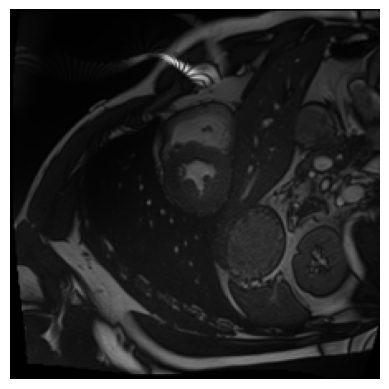

In [14]:
# Visualize a sample from the dataset
sample_img = img.permute(1, 2, 0).numpy()  # Convert from (C, H, W) to (H, W, C)

plt.imshow(sample_img)
plt.axis('off')
plt.show()

Batch 1
Images shape: torch.Size([4, 3, 224, 224])
Labels: tensor([4, 1, 3, 2])


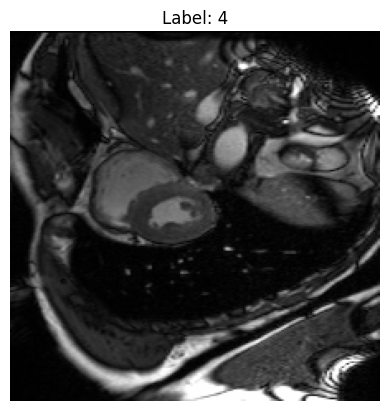

In [15]:
# Use DataLoader to iterate through batches
batch_size = 4
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

for batch_idx, (images, labels) in enumerate(dataloader):
    print(f"Batch {batch_idx + 1}")
    print(f"Images shape: {images.shape}")
    print(f"Labels: {labels}")
    
    # Visualize the first image in the batch
    img_batch_np = images[0].numpy()
    if img_batch_np.ndim == 3:
        img_batch_np = img_batch_np.transpose(1, 2, 0)  # Convert from (C, H, W) to (H, W, C)
    
    plt.imshow(img_batch_np.squeeze(), cmap='gray')
    plt.title(f"Label: {labels[0].item()}")
    plt.axis('off')
    plt.show()
    
    break  # Only process the first batch for testing purposes